In [42]:
# import libraries

import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

In [53]:
# index of landmarks in right and left eye

left_eye_lm = [130, 247, 30, 29, 27, 28, 56, 190, 243, 112, 26, 22, 23, 24, 110, 25]
right_eye_lm = [359, 467, 260, 259, 257, 258, 286, 414, 463, 341, 256, 252, 253, 254, 339, 255]

print(len(left_eye_lm))
print(len(right_eye_lm))

16
16


In [54]:
# test on img


# For static images:
with mp_holistic.Holistic(
    static_image_mode=True) as holistic:
        image = cv2.imread("../data/imgs/eye_img.jpg")
        image_height, image_width, _ = image.shape
        # Convert the BGR image to RGB before processing.
        results = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        if results.pose_landmarks:
          print(
              f'Nose coordinates: ('
              f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].x * image_width}, '
              f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].y * image_height})'
          )
        # Draw pose, left and right hands, and face landmarks on the image.
        annotated_image = image.copy()
        mp_drawing.draw_landmarks(
            annotated_image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
            mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))
#         mp_drawing.draw_landmarks(
#             annotated_image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
#         mp_drawing.draw_landmarks(
#             annotated_image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
#         mp_drawing.draw_landmarks(
#             annotated_image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
        cv2.imshow('img', annotated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

Nose coordinates: (160.1835060119629, 226.37474536895752)


-1

In [55]:
# get x and y coords for the eyes

left_eye_x = []
left_eye_y = []
for lm in left_eye_lm:
    # mp return normalized coords, so we multiply
    left_eye_x.append(int((results.face_landmarks.landmark[lm].x) * image_width))
    left_eye_y.append(int((results.face_landmarks.landmark[lm].y) * image_height))
left_eye = list(zip(left_eye_x, left_eye_y))

right_eye_x = []
right_eye_y = []
for lm in right_eye_lm:
    right_eye_x.append(int((results.face_landmarks.landmark[lm].x) * image_width))
    right_eye_y.append(int((results.face_landmarks.landmark[lm].y) * image_height))
right_eye = list(zip(right_eye_x, right_eye_y))
print(left_eye)
print(right_eye)

[(99, 185), (100, 180), (104, 177), (109, 175), (117, 173), (126, 174), (134, 176), (141, 182), (143, 187), (140, 190), (136, 193), (129, 195), (120, 196), (113, 195), (106, 193), (102, 190)]
[(226, 181), (226, 176), (222, 174), (216, 171), (208, 170), (200, 171), (192, 174), (185, 180), (184, 186), (187, 188), (191, 190), (198, 193), (206, 193), (214, 192), (221, 190), (224, 186)]


In [56]:
# convert list of tuples into numpy array

left_eye = np.array(left_eye, dtype="int")
right_eye = np.array(right_eye, dtype="int")

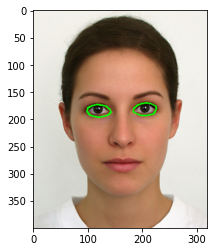

In [57]:
# get convex hull, draw and show img

leye_hull = cv2.convexHull(left_eye)
reye_hull = cv2.convexHull(right_eye)

cv2.drawContours(image, [leye_hull], -1, (0, 255, 0), 2)
cv2.drawContours(image, [reye_hull], -1, (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))